In [182]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('data/Kickstarter014.csv')

In [9]:
set_length = []
set_feat_num = []

for i in range(10):
    df_check = pd.read_csv(f'data/Kickstarter00{i}.csv')
    set_length.append(len(df_check))
    set_feat_num.append(df_check.shape[1])


for i in range(10, 56):
    df_check = pd.read_csv(f'data/Kickstarter0{i}.csv')
    set_length.append(len(df_check))
    set_feat_num.append(df_check.shape[1])

print(f"Observations in each dataset: {set_length}")
print(f"Number of features in each dataset: {set_feat_num}")

Observations in each dataset: [3779, 3784, 3790, 3795, 3789, 3780, 3786, 3788, 3784, 3790, 3786, 3784, 3781, 3793, 3786, 3792, 3782, 3786, 3785, 3791, 3786, 3787, 3778, 3780, 3796, 3784, 3793, 3779, 3785, 3785, 3793, 3787, 3788, 3780, 3784, 3794, 3784, 3793, 3781, 3786, 3779, 3792, 3786, 3790, 3779, 3787, 3786, 3788, 3792, 3784, 3789, 3780, 3791, 3787, 3793, 965]
Number of features in each dataset: [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37]


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   backers_count             3786 non-null   int64  
 1   blurb                     3786 non-null   object 
 2   category                  3786 non-null   object 
 3   converted_pledged_amount  3786 non-null   int64  
 4   country                   3786 non-null   object 
 5   created_at                3786 non-null   int64  
 6   creator                   3786 non-null   object 
 7   currency                  3786 non-null   object 
 8   currency_symbol           3786 non-null   object 
 9   currency_trailing_code    3786 non-null   bool   
 10  current_currency          3786 non-null   object 
 11  deadline                  3786 non-null   int64  
 12  disable_communication     3786 non-null   bool   
 13  friends                   8 non-null      object 
 14  fx_rate 

In [72]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,111,Short doc series of human stories--\nIt doesn'...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",15035,US,1407190947,"{""id"":429482052,""name"":""Blake Bogosian"",""is_re...",USD,$,True,...,help-100-percent-human-make-100-episodes,https://www.kickstarter.com/discover/categorie...,True,False,successful,1410568210,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",15035.0,international
1,231,"Jim Balent's Tarot, Witch of the Black Rose Or...","{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",20173,US,1541274516,"{""id"":2062479221,""name"":""Jim Balent"",""slug"":""j...",USD,$,True,...,the-magick-grows-tarot-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1546873202,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",20173.0,international
2,62,Inspiration & reflection for a journey into a ...,"{""id"":50,""name"":""Poetry"",""slug"":""publishing/po...",3881,US,1478195452,"{""id"":1982153317,""name"":""Jon Symes"",""is_regist...",USD,$,True,...,songs-of-uprising-poetry-to-guide-us-home,https://www.kickstarter.com/discover/categorie...,True,False,successful,1480924741,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",3881.0,international
3,3,Prototype of portable temperature controlled p...,"{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",3,US,1446061598,"{""id"":157397274,""name"":""EVANESCE LLC"",""slug"":""...",USD,$,True,...,temperature-controlled-cooling-and-warming-pla...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1449177501,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",3.0,domestic
4,125,A comic book anthology featuring twisted tales...,"{""id"":249,""name"":""Anthologies"",""slug"":""comics/...",5190,US,1495714565,"{""id"":238150584,""name"":""Enrica Jang"",""slug"":""R...",USD,$,True,...,the-strip-a-twisted-vegas-comic-anthology,https://www.kickstarter.com/discover/categorie...,True,False,successful,1503597598,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",5190.0,international


In [138]:
df['conv-pledged'] = df['converted_pledged_amount'] - df['usd_pledged']

In [141]:
df['conv-pledged']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
3781     0.000000
3782     0.000000
3783    -0.289238
3784   -10.353630
3785     0.000000
Name: conv-pledged, Length: 3786, dtype: float64

In [73]:
# Check if 'category' contains project ID
df.category.nunique()

# Result: Since there are 164 uniques in a dataset of appr. 3800 observations, 'id' in category seems not to be the project ID.

161

In [81]:
# Check if 'id' is unique per observation
# Assumption: 'id' is the project-id
# Create a dataframe with only non-unique observations based on 'id'
non_uniques = (df.id.value_counts()).reset_index()
non_uniques = non_uniques[non_uniques.id>1]

# Result: Some id's appear more than one time, so not every observation is a unique project.

In [82]:
non_uniques

,index,id
0,1303045937,2
1,1445216097,2
2,519668943,2
3,708998456,2
4,418579428,2
5,1801789043,2


In [77]:
# Grab one id which appears more than one time in the dataset to see if it is a duplicate.
dup_test = df[df.id == 1445216097]

In [78]:
# Save "duplicate" to csv to inspect in other software:
dup_test.to_csv(f'data/dup_test_{dup_test["id"]}.csv')

# Seems that the observations only differ in the 'source url' column.

In [100]:
# Check for duplicates with pandas-built-in-function:
df_drop = df.drop(columns=['source_url'])
duplicates_series = df_drop.duplicated()
duplicates_series = duplicates_series.astype(int)
duplicates_series.sum()

# RESULT: No duplicates are found since they seem to differ in 'source url' column.

0

In [99]:
duplicates_series

0       0
1       0
2       0
3       0
4       0
       ..
3781    0
3782    0
3783    0
3784    0
3785    0
Length: 3786, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

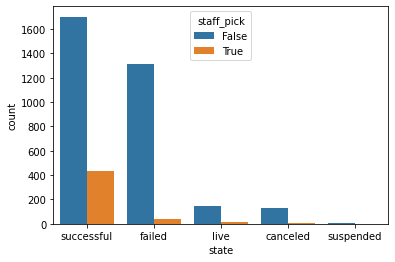

In [183]:
sns.countplot('state', data=df, hue='staff_pick')

<AxesSubplot:xlabel='state', ylabel='count'>

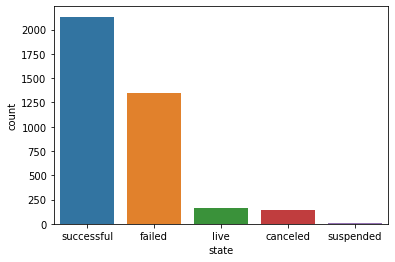

In [184]:
sns.countplot('state', data=df)

In [94]:
df.friends.unique()

array([nan, '[]'], dtype=object)

In [97]:
df.disable_communication.value_counts()

False    3778
True        8
Name: disable_communication, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

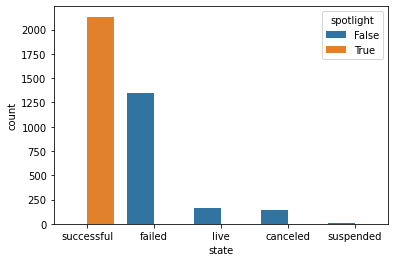

In [185]:
sns.countplot('state', data=df, hue='spotlight')

In [111]:
df.slug

0                help-100-percent-human-make-100-episodes
1                      the-magick-grows-tarot-oracle-deck
2               songs-of-uprising-poetry-to-guide-us-home
3       temperature-controlled-cooling-and-warming-pla...
4               the-strip-a-twisted-vegas-comic-anthology
                              ...                        
3781    thynkbot-a-mini-robot-you-control-with-your-th...
3782    insane-animation-film-festival-in-malmo-sweden-11
3783                                        into-the-wood
3784                                          raise-rlyeh
3785                                   scratch-master-pro
Name: slug, Length: 3786, dtype: object

In [115]:
df.profile[1]

'{"id":3506427,"project_id":3506427,"state":"inactive","state_changed_at":1541274516,"name":null,"blurb":null,"background_color":null,"text_color":null,"link_background_color":null,"link_text_color":null,"link_text":null,"link_url":null,"show_feature_image":false,"background_image_opacity":0.8,"should_show_feature_image_section":true,"feature_image_attributes":{"image_urls":{"default":"https://ksr-ugc.imgix.net/assets/023/150/501/12b90420074bedf1a024b36ac3552e14_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1541446702&auto=format&frame=1&q=92&s=7043f76ae47491071b5be9cbb90b3928","baseball_card":"https://ksr-ugc.imgix.net/assets/023/150/501/12b90420074bedf1a024b36ac3552e14_original.jpg?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1541446702&auto=format&frame=1&q=92&s=efb9151482e557af425a79cc893126ca"}}}'

In [133]:
df.is_starred.unique()

array([nan, False], dtype=object)

In [137]:
df.friends.unique()

array([nan, '[]'], dtype=object)

In [142]:
df.pledged

0       15035.0
1       20173.0
2        3881.0
3           3.0
4        5190.0
         ...   
3781     1772.0
3782        0.0
3783        2.0
3784      598.0
3785      605.0
Name: pledged, Length: 3786, dtype: float64

In [143]:
df.usd_pledged

0       15035.000000
1       20173.000000
2        3881.000000
3           3.000000
4        5190.000000
            ...     
3781     1772.000000
3782        0.000000
3783        2.289238
3784      468.353630
3785      605.000000
Name: usd_pledged, Length: 3786, dtype: float64

In [144]:
df['pledg-usd_pledg'] = df['pledged'] - df['usd_pledged']

In [161]:
df.iloc[df['pledg-usd_pledg'].argmax()]

backers_count                                                            1754
blurb                       Black Rock Shooter Creator "huke" Produced "LM...
category                    {"id":28,"name":"Product Design","slug":"desig...
converted_pledged_amount                                               473187
country                                                                    JP
created_at                                                         1525669820
creator                     {"id":992618958,"name":"TRIKT","is_registered"...
currency                                                                  JPY
currency_symbol                                                             ¥
currency_trailing_code                                                  False
current_currency                                                          USD
deadline                                                           1530406863
disable_communication                                           

In [147]:
df['usd_pledged'].sum()

42508840.60783862

In [160]:
df.usd_pledged.iloc[df['pledg-usd_pledg'].argmax()]

482492.92775422

In [168]:
df['conv-pledged'].min()

-9305.927754220029

In [178]:
display(df[df['usd_type']=='international'].sort_values('pledg-usd_pledg', ascending=False))

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,conv-pledged,pledg-usd_pledg
2130,1754,"Black Rock Shooter Creator ""huke"" Produced ""LM...","{""id"":28,""name"":""Product Design"",""slug"":""desig...",473187,JP,1525669820,"{""id"":992618958,""name"":""TRIKT"",""is_registered""...",JPY,¥,False,...,True,True,successful,1530406865,0.009208,"{""web"":{""project"":""https://www.kickstarter.com...",482492.927754,international,-9305.927754,5.191922e+07
3722,221,"An international craft school in Kyoto, Japan,...","{""id"":356,""name"":""Woodworking"",""slug"":""crafts/...",33779,JP,1517993169,"{""id"":1911438091,""name"":""Takami Kawai 河井 尊臣""...",JPY,¥,False,...,True,True,successful,1521172251,0.009337,"{""web"":{""project"":""https://www.kickstarter.com...",33438.872934,international,340.127066,3.547994e+06
626,118,Hand crafted richness for a reasonable price.,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",11224,JP,1508235887,"{""id"":557662762,""name"":""proef"",""is_registered""...",JPY,¥,False,...,True,True,successful,1512373906,0.008771,"{""web"":{""project"":""https://www.kickstarter.com...",11103.731520,international,120.268480,1.254896e+06
2623,46,The goal of the game is to build the tallest b...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",2680,JP,1540445597,"{""id"":2039314666,""name"":""Mitsuo Yamamoto"",""is_...",JPY,¥,False,...,True,False,successful,1544490549,0.008851,"{""web"":{""project"":""https://www.kickstarter.com...",2667.921763,international,12.078237,2.987411e+05
1720,637,"Tracks your heart-rate, analyzes your sleep qu...","{""id"":341,""name"":""Wearables"",""slug"":""technolog...",43215,HK,1521177704,"{""id"":1237640011,""name"":""BozGo"",""is_registered...",HKD,$,True,...,True,False,successful,1525017513,0.127452,"{""web"":{""project"":""https://www.kickstarter.com...",43227.592452,international,-12.592452,2.959404e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,3892,Smart interdental cleaning! Thanks to its feel...,"{""id"":28,""name"":""Product Design"",""slug"":""desig...",116997,DE,1516370898,"{""id"":2106362391,""name"":""Louis, Marc & Burak"",...",EUR,€,False,...,True,False,successful,1524150035,1.227155,"{""web"":{""project"":""https://www.kickstarter.com...",115985.780090,international,1011.219910,-2.146978e+04
2413,1228,"Black Hallows Townsfolk, a range of 28mm or 32...","{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",101715,GB,1535453174,"{""id"":147900702,""name"":""Jon Stynes"",""is_regist...",GBP,£,False,...,True,False,successful,1538396701,1.303302,"{""web"":{""project"":""https://www.kickstarter.com...",101731.827041,international,-16.827041,-2.367483e+04
2841,1203,Pro Pinball: Timeshock! remade from scratch an...,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",78349,GB,1362497177,"{""id"":500643708,""name"":""Barnstorm Games"",""is_r...",GBP,£,False,...,True,False,successful,1379188835,1.533599,"{""web"":{""project"":""https://www.kickstarter.com...",75682.351784,international,2666.648216,-2.633284e+04
2534,1226,"Finally, a toy you can have a real conversatio...","{""id"":52,""name"":""Hardware"",""slug"":""technology/...",106403,GB,1372675554,"{""id"":2117525416,""name"":""Supertoy Robotics"",""i...",GBP,£,False,...,True,False,successful,1377213479,1.528141,"{""web"":{""project"":""https://www.kickstarter.com...",104098.473306,international,2304.526694,-3.597747e+04


In [179]:
display(df.sort_values('pledg-usd_pledg', ascending=False))

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,conv-pledged,pledg-usd_pledg
2130,1754,"Black Rock Shooter Creator ""huke"" Produced ""LM...","{""id"":28,""name"":""Product Design"",""slug"":""desig...",473187,JP,1525669820,"{""id"":992618958,""name"":""TRIKT"",""is_registered""...",JPY,¥,False,...,True,True,successful,1530406865,0.009208,"{""web"":{""project"":""https://www.kickstarter.com...",482492.927754,international,-9305.927754,5.191922e+07
2749,11,The world’s first HDMI-Compatible 3D Sound Act...,"{""id"":339,""name"":""Sound"",""slug"":""technology/so...",34979,JP,1535712856,"{""id"":1151870450,""name"":""KISSonix Inc."",""is_re...",JPY,¥,False,...,True,False,successful,1539615600,0.009000,"{""web"":{""project"":""https://www.kickstarter.com...",35282.117832,domestic,-303.117832,3.884827e+06
3722,221,"An international craft school in Kyoto, Japan,...","{""id"":356,""name"":""Woodworking"",""slug"":""crafts/...",33779,JP,1517993169,"{""id"":1911438091,""name"":""Takami Kawai 河井 尊臣""...",JPY,¥,False,...,True,True,successful,1521172251,0.009337,"{""web"":{""project"":""https://www.kickstarter.com...",33438.872934,international,340.127066,3.547994e+06
626,118,Hand crafted richness for a reasonable price.,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",11224,JP,1508235887,"{""id"":557662762,""name"":""proef"",""is_registered""...",JPY,¥,False,...,True,True,successful,1512373906,0.008771,"{""web"":{""project"":""https://www.kickstarter.com...",11103.731520,international,120.268480,1.254896e+06
2017,1806,"Customizable shortcut keys, command sequences ...","{""id"":28,""name"":""Product Design"",""slug"":""desig...",121830,HK,1523181622,"{""id"":1594516409,""name"":""Delux"",""is_registered...",HKD,$,True,...,True,True,successful,1528462372,0.127396,"{""web"":{""project"":""https://www.kickstarter.com...",121767.746580,domestic,62.253420,8.340543e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,670,Set your sound on fire with a spectacular ligh...,"{""id"":28,""name"":""Product Design"",""slug"":""desig...",160780,GB,1537987882,"{""id"":1070268364,""name"":""Vincoe®"",""slug"":""vinc...",GBP,£,False,...,True,False,successful,1542988741,1.281045,"{""web"":{""project"":""https://www.kickstarter.com...",159917.910361,domestic,862.089639,-3.508391e+04
2534,1226,"Finally, a toy you can have a real conversatio...","{""id"":52,""name"":""Hardware"",""slug"":""technology/...",106403,GB,1372675554,"{""id"":2117525416,""name"":""Supertoy Robotics"",""i...",GBP,£,False,...,True,False,successful,1377213479,1.528141,"{""web"":{""project"":""https://www.kickstarter.com...",104098.473306,international,2304.526694,-3.597747e+04
1051,2004,Explore Mega-City One and beyond with the offi...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",191808,GB,1485642877,"{""id"":250609397,""name"":""Morrus"",""slug"":""enworl...",GBP,£,False,...,True,False,successful,1540508400,1.307644,"{""web"":{""project"":""https://www.kickstarter.com...",194580.076712,domestic,-2772.076712,-4.577808e+04
2073,878,Limited Edition Swiss Made Self-Winding Watch ...,"{""id"":7,""name"":""Design"",""slug"":""design"",""posit...",431535,DE,1538819299,"{""id"":1563376995,""name"":""Chronotechna"",""is_reg...",EUR,€,False,...,True,False,successful,1543597206,1.138199,"{""web"":{""project"":""https://www.kickstarter.com...",431121.318650,domestic,413.681350,-5.234632e+04


In [176]:
df.created_at

0       1407190947
1       1541274516
2       1478195452
3       1446061598
4       1495714565
           ...    
3781    1437488509
3782    1430694884
3783    1542304807
3784    1504925626
3785    1522705369
Name: created_at, Length: 3786, dtype: int64

<AxesSubplot:xlabel='converted_pledged_amount', ylabel='usd_pledged'>

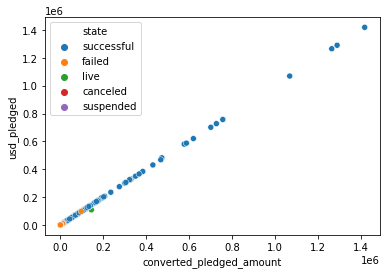

In [188]:
sns.scatterplot('converted_pledged_amount', 'usd_pledged', hue='state', data=df)

In [191]:
df.groupby('state').mean()

,backers_count,converted_pledged_amount,created_at,currency_trailing_code,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,pledged,spotlight,staff_pick,state_changed_at,static_usd_rate,usd_pledged,conv-pledged,pledg-usd_pledg
state,,,,,,,,,,,,,,,,,,,
canceled,16.569343,1652.656934,1.450005e+09,0.854015,1.456462e+09,0.0,0.935091,46968.569343,1.160551e+09,0.000000,1.453340e+09,2504.948175,0.0,0.058394,1.454799e+09,0.950716,1650.254470,2.402464,854.693705
failed,10.662222,897.998519,1.449338e+09,0.815556,1.455669e+09,0.0,0.983164,75772.924444,1.086556e+09,0.000000,1.452685e+09,1283.775733,0.0,0.028148,1.455669e+09,1.004269,900.771841,-2.773322,383.003893
live,112.509434,6364.452830,1.545611e+09,0.767296,1.554193e+09,0.0,0.961165,99691.628931,1.080902e+09,0.930818,1.550974e+09,7698.769686,0.0,0.094340,1.550974e+09,0.942048,6108.927892,255.524939,1589.841794
successful,224.989212,18791.411820,1.453101e+09,0.825516,1.459721e+09,0.0,1.002514,17316.067800,1.077909e+09,0.000000,1.457032e+09,49438.869578,1.0,0.202158,1.459721e+09,1.017209,18805.703430,-14.291610,30633.166148
suspended,7.375000,204.125000,1.447182e+09,1.000000,1.450597e+09,1.0,0.820344,17821.125000,9.619917e+08,0.000000,1.447346e+09,457.875000,0.0,0.000000,1.448453e+09,0.830512,204.314165,-0.189165,253.560835


In [192]:
dict_map = {'successful':1,'failed':0}
df['state_bool'] = df['state'].map(dict_map)

In [194]:
df.state_bool

0       1.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
3781    0.0
3782    0.0
3783    0.0
3784    1.0
3785    0.0
Name: state_bool, Length: 3786, dtype: float64